<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/lipo%20optuna%20and%20OHB%20eror%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import math;

import sklearn 
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sklearn
from pandas import read_csv
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFdr
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# path = r"C:\\Users\\ahmad\\Desktop\\bace_global_cdf_rdkit.csv"
# fileX=open(path)
# dataXX=csv.reader(fileX)
# headerX=next(dataXX)
# print(os.uname())

In [3]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()

Saving lipo(Lables).csv to lipo(Lables).csv


Saving lipo_global_cdf_rdkit.csv to lipo_global_cdf_rdkit.csv


In [4]:
import io
dataY = pd.read_csv(io.BytesIO(uploaded['lipo(Lables).csv']))
print(dataY[dataY.isnull().any(axis=1)])
print(dataY.shape)
dataY = dataY.drop(1561)
print(dataY.shape)

Empty DataFrame
Columns: [smiles, lipo]
Index: []
(4200, 2)
(4199, 2)


In [5]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))
data.head()

,"('RDKit2DNormalized_calculated', <class 'bool'>)","('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,True,0.165068,0.378858,0.267690,0.337793,0.353329,0.326565,0.389881,0.366088,0.409441,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.722127
1,True,0.765362,0.695748,0.776859,0.729485,0.788956,0.726874,0.648505,0.824561,0.609487,...,9.999565e-01,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.422093
2,True,0.714232,0.207465,0.161372,0.168520,0.240092,0.182951,0.183410,0.275841,0.190398,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,1.000000e+00,4.703598e-08,0.166633,0.855567
3,True,0.331822,0.569701,0.519154,0.417706,0.510189,0.519857,0.449285,0.540375,0.473398,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,1.000000e+00,4.703598e-08,0.166633,0.365929
4,True,0.864685,0.452665,0.595094,0.625074,0.578910,0.482260,0.514695,0.432820,0.672904,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.755285


[-1.18 3.69 3.37 ... 2.1 2.65 2.7]
      ('RDKit2DNormalized_calculated', <class 'bool'>)  \
1561                                              True   

      ('BalabanJ', <class 'numpy.float64'>)  \
1561                                  0.895   

      ('BertzCT', <class 'numpy.float64'>)  ('Chi0', <class 'numpy.float64'>)  \
1561                              0.230752                           0.031331   

      ('Chi0n', <class 'numpy.float64'>)  ('Chi0v', <class 'numpy.float64'>)  \
1561                            0.032387                            0.061726   

      ('Chi1', <class 'numpy.float64'>)  ('Chi1n', <class 'numpy.float64'>)  \
1561                           0.050799                            0.045963   

      ('Chi1v', <class 'numpy.float64'>)  ('Chi2n', <class 'numpy.float64'>)  \
1561                            0.116251                             0.04344   

      ...  ('fr_sulfonamd', <class 'numpy.float64'>)  \
1561  ...                               1.593061e-17 

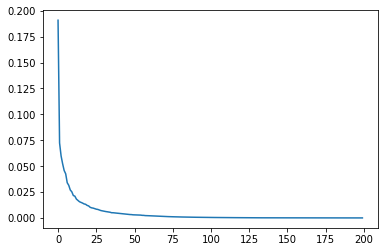

(840, 200)
(840, 1)
(3358, 200)
(3358, 1)


In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import io

data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))

arrayY = dataY.values
Y = arrayY[1: , 1 ]
print(Y)
print(data[data.isnull().any(axis=1)])
print(len(data))
data = data.dropna()
print(len(data))
array = data.values
X = array[1:,1:]
print(X)
X_train, X_test ,Y_train , Y_test  = train_test_split(X, Y ,test_size=0.2)
scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))
print(data.shape)
print(len(X_test))
pca = PCA(n_components=200)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(200),pca.explained_variance_ratio_)
plt.show()
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

In [7]:
import pandas as pd
from sklearn import preprocessing
pca = PCA(n_components=60)
pca.fit(X_train)
X_train=pca.transform(X_train)



X_test = pca.transform(X_test)

scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))
print(scaler_data)

MinMaxScaler()


In [8]:
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

(840, 60)
(840, 1)
(3358, 60)
(3358, 1)


In [9]:
#Y_w = Y_train.reshape(-1,1)
Y_train_new =  Y_train.astype(np.float)
Y_test_new = Y_test.astype(np.float)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tensor_x_train = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x_test = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y_train = torch.tensor(Y_train_new , dtype=torch.float).to(device)
tensor_y_test= torch.tensor(Y_test_new, dtype=torch.float).to(device)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x_train, tensor_y_train) 
testset = TensorDataset(tensor_x_test,tensor_y_test)

In [11]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [12]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
# a = {"a":tune.quniform(50, 200, 10) , "b": 5}
# print(type(a.get("a")))
from ray.tune import CLIReporter
from ray.tune.schedulers.hb_bohb import HyperBandForBOHB

In [14]:
def load_data(data_dir=None):
    return trainset, testset

In [15]:
# # Net().__init__(self , confing) 
#     config = {
#         "act1 ": tune.choice(["relu","tanh","selu"]),
#         "act2" : tune.choice(["relu","tanh","selu"]),
#         "act3" : tune.choice(["relu","tanh","selu"]),
#         "lr": tune.quniform(0.0005, 0.001, 0.0001),
#         "batch_size": tune.choice([8, 16, 32]),
#         "hidden_dim1" : tune.quniform(50, 200, 10),
#         "hidden_dim2" : tune.quniform(50, 200, 10),
#         "hidden_dim3" : tune.quniform(50, 200, 10),
#     }
#   self = { "confing": confing , "hd":}
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1", 100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2", 100))
        self.hidden_dim3 = int(self.config.get("hidden_dim3", 100))

        self.act1 = self.config.get("act1", "relu") 
        self.act2 = self.config.get("act2", "relu") 
        self.act3 = self.config.get("act3", "relu")

        self.linear1 = nn.Linear(60, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, self.hidden_dim3)
        self.linear4 = nn.Linear(self.hidden_dim3, 1)
    
    @staticmethod
    def activation_func(act_str):
        if act_str=="tanh":
            return eval("torch."+act_str)
        elif act_str=="selu" or act_str=="relu":   
            return eval("torch.nn.functional."+act_str)

    def forward(self, x):
        output = self.linear1(x)
        output = self.activation_func(self.act1)(output)
        output = self.linear2(output)
        output = self.activation_func(self.act2)(output)
        output = self.linear3(output)
        output = self.activation_func(self.act3)(output)
        output = self.linear4(output)        
        return output

In [16]:
model = Net({})

In [18]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [19]:
summary(model, (1,tensor_x_train.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           6,100
            Linear-2               [-1, 1, 100]          10,100
            Linear-3               [-1, 1, 100]          10,100
            Linear-4                 [-1, 1, 1]             101
Total params: 26,401
Trainable params: 26,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.10
Estimated Total Size (MB): 0.10
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |    6000    |
|  linear1.bias  |    100     |
| linear2.weight |   10000    |
|  linear2.bias  |    100     |
| linear3.weight |   10000    |
|  linear3.bias  |    100     |
| linear4.we

26401

In [20]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    # criterion = nn.CrossEntropyLoss()

    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        val_loss = 0.0
        net.eval() # Prepare model for evaluation
        for i, data in enumerate(valloader):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)

                # Inverse transform of the labels' scaler
                outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
                labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")

In [21]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

In [22]:
ray.shutdown()
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

{'memory': 7893206631.0, 'node:172.28.0.2': 1.0, 'CPU': 2.0, 'object_store_memory': 3946603315.0}


''

In [23]:
%%capture
try:
    import optuna
except:
    %pip install optuna
    import optuna

In [13]:
!pip install hpbandster ConfigSpace
!pip install dragonfly-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 101 kB/s 
     |████████████████████████████████| 4.7 MB 33.6 MB/s 
     |████████████████████████████████| 89 kB 8.5 MB/s 
  Created wheel for hpbandster: filename=hpbandster-0.7.4-py3-none-any.whl size=80006 sha256=83a9618bde73fcbb99e71ca48d056c32451d4398f7d10699f19b47395ee886c3
  Stored in directory: /root/.cache/pip/wheels/d9/88/fc/61ab6b9f386a386839668631c39a6dc3c2fb0ec7000d552faa
Successfully built hpbandster
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 23.9 MB/s 
  Created wheel for dragonfly-opt: filename=dragonfly_opt-0.1.6-cp37-cp37m-linux_x86_64.whl size=411410 sha256=74ea6c3bf572a3c6a5481be9c4f1aec717a5066043417ff1cb37f8cdbd37af9b
  Stored in directory: /root/.cache/pip/wheels/bb/79/94/461f622bdd697be30dfe11c2590b574deee78320aa6f5cc

In [24]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)
    training_iteration = 50
    scheduler = HyperBandForBOHB(
    time_attr="training_iteration",
    max_t=training_iteration, 
    reduction_factor=8, 
    stop_last_trials=True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-18 21:02:25,223	INFO logger.py:630 -- pip install "ray[tune]" to see TensorBoard files.
2022-07-18 21:02:25,227	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-18 21:02:25 (running for 00:00:00.63)
Memory usage on this node: 1.3/12.7 GiB
Using HyperBand: num_stopped=0 total_brackets=2
Round #0:
  Bracket(Max Size (n)=12, Milestone (r)=6, completed=0.0%): {RUNNING: 1} 
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-02-25
Number of trials: 1/50 (1 RUNNING)
+-------------------------+----------+----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc            | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------|
| trainable_func_ecbdcee6 | RUNNING  | 172.28.0.2:925 | relu    | selu   | tanh   |           16 |  

(func pid=1085) 2022-07-18 21:04:03,270	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_ecbdcee6_1_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=200.0000,hidden_dim2=80.0000,hidden_dim3=200.000_2022-07-18_21-02-25/checkpoint_tmpfb09fb/./
(func pid=1085) 2022-07-18 21:04:03,271	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 36.27136540412903, '_episodes_total': None}


Trial trainable_func_ecbdcee6 reported epoch=0,loss=0.02272763673151776,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 80.0, 'hidden_dim3': 200.0}.


(func pid=2396) 2022-07-18 21:04:16,171	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_14805c0a_8_act1=selu,act2=tanh,act3=selu,batch_size=16,hidden_dim1=120.0000,hidden_dim2=120.0000,hidden_dim3=90.000_2022-07-18_21-03-32/checkpoint_tmpd09c3f/./
(func pid=2396) 2022-07-18 21:04:16,171	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 21.59152054786682, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:04:06 (running for 00:01:41.28)
Memory usage on this node: 8.0/12.7 GiB
Using HyperBand: num_stopped=8 total_brackets=3
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=38.1%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {PENDING: 1, RUNNING: 2} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-02-25
Number of trials: 13/50 (1 PENDING, 4 RUNNING, 8 TERMINATED)
+-------------------------+------------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+-----------+----------------------+
| Trial name              | status     | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |      loss |   training_iteration |
|-------------------------+------------+-----------

(func pid=2396) ERROR: Unexpected segmentation fault encountered in worker.
(func pid=2396)  


== Status ==
Current time: 2022-07-18 21:05:40 (running for 00:03:15.45)
Memory usage on this node: 2.6/12.7 GiB
Using HyperBand: num_stopped=8 total_brackets=3
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=65.0%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=36.7%): {PENDING: 1, RUNNING: 2} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-02-25
Number of trials: 13/50 (1 PENDING, 4 RUNNING, 8 TERMINATED)
+-------------------------+------------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+-----------+----------------------+
| Trial name              | status     | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |      loss |   training_iteration |
|-------------------------+------------+----------

(func pid=2396) 2022-07-18 21:05:44,838	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2396) Traceback (most recent call last):
(func pid=2396)   File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1134, in _try_get_data
(func pid=2396)     data = self._data_queue.get(timeout=timeout)
(func pid=2396)   File "/usr/lib/python3.7/multiprocessing/queues.py", line 105, in get
(func pid=2396)     raise Empty
(func pid=2396) _queue.Empty
(func pid=2396) 
(func pid=2396) The above exception was the direct cause of the following exception:
(func pid=2396) 
(func pid=2396) Traceback (most recent call last):
(func pid=2396)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2396)     self._entrypoint()
(func pid=2396)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2396)     self._status_reporter.get_checkpoint(),
(func pid=2396)

The trial trainable_func_14805c0a errored with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 90.0}. Error file: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_14805c0a_8_act1=selu,act2=tanh,act3=selu,batch_size=16,hidden_dim1=120.0000,hidden_dim2=120.0000,hidden_dim3=90.000_2022-07-18_21-03-32/error.txt
Trial trainable_func_273a837a reported epoch=46,loss=0.01783168508525918,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 90.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-18 21:05:45 (running for 00:03:20.51)
Memory usage on this node: 2.6/12.7 GiB
Using HyperBand: num_stopped=8 total_brackets=3
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=66.2%): {ERROR: 1, RUNNING: 1, TERMINATED: 8} 
  Bracket(Max Size (n)=3

(func pid=2453) 2022-07-18 21:09:07,324	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_6aac567e_15_act1=selu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=150.0000,hidden_dim3=90.000_2022-07-18_21-06-34/checkpoint_tmpf7c234/./
(func pid=2453) 2022-07-18 21:09:07,324	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 40.42126512527466, '_episodes_total': None}
(func pid=8089) 2022-07-18 21:09:16,576	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_9d4e0794_20_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=70.0000,hidden_dim2=90.0000,hidden_dim3=150.0000_2022-07-18_21-07-43/checkpoint_tmpf95151/./
(func pid=8089) 2022-07-18 21:09:16,576	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': N

== Status ==
Current time: 2022-07-18 21:09:07 (running for 00:06:42.59)
Memory usage on this node: 2.1/12.7 GiB
Using HyperBand: num_stopped=15 total_brackets=6
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {ERROR: 1, TERMINATED: 9} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=33.8%): {RUNNING: 2, TERMINATED: 7} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {RUNNING: 2} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-02-25
Number of trials: 24/50 (1 ERROR, 4 RUNNING, 19 TERMINATED)
+-------------------------+------------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+-----------+----------------------+
| Trial name              | status     | loc             | act1    | act2   |

(func pid=8151) 2022-07-18 21:16:51,587	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_6b2061b2_26_act1=relu,act2=tanh,act3=selu,batch_size=8,hidden_dim1=140.0000,hidden_dim2=180.0000,hidden_dim3=90.000_2022-07-18_21-13-45/checkpoint_tmp823c87/./
(func pid=8151) 2022-07-18 21:16:51,587	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 45.75308132171631, '_episodes_total': None}


Trial trainable_func_6b2061b2 reported epoch=0,loss=0.022096197563611607,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 140.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.


(func pid=14165) 2022-07-18 21:17:00,102	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_b2525bee_31_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=130.0000,hidden_dim2=170.0000,hidden_dim3=90.00_2022-07-18_21-15-09/checkpoint_tmpa94b9a/./
(func pid=14165) 2022-07-18 21:17:00,102	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 12.327200889587402, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:16:56 (running for 00:14:31.56)
Memory usage on this node: 2.2/12.7 GiB
Using HyperBand: num_stopped=23 total_brackets=9
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {ERROR: 1, TERMINATED: 9} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 9} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #2:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=38.1%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {PENDING: 1, RUNNING: 2} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-02-25
Number of trials: 38/50 (1 ERROR, 1 PENDING, 4 RUNNING, 32 TERMINATED)
+-------------------------+------------+------------------+---------+--------+

(func pid=14226) 2022-07-18 21:21:39,239	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_60610f32_40_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=70.00_2022-07-18_21-20-02/checkpoint_tmpb0e619/./
(func pid=14226) 2022-07-18 21:21:39,239	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 21.05159640312195, '_episodes_total': None}
(func pid=20157) 2022-07-18 21:21:45,165	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-02-25/trainable_func_9049597a_46_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=160.0000,hidden_dim2=200.0000,hidden_dim3=50.00_2022-07-18_21-21-18/checkpoint_tmp283736/./
(func pid=20157) 2022-07-18 21:21:45,165	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total

== Status ==
Current time: 2022-07-18 21:21:41 (running for 00:19:16.21)
Memory usage on this node: 2.2/12.7 GiB
Using HyperBand: num_stopped=31 total_brackets=12
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {ERROR: 1, TERMINATED: 9} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 9} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #2:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #3:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=37.5%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {RUNNING: 1} 
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-1

TuneError: ignored